# [Wp3 A]
The title of the notebook should be coherent with file name. Namely, file name should be:    
*author's initials_progressive number_title.ipynb*    
For example:    
*EF_01_Data Exploration.ipynb*

## Purpose
State the purpose of the notebook.

## Methodology
Quickly describe assumptions and processing steps.

## WIP - improvements
Use this section only if the notebook is not final.

Notable TODOs:
- todo 1;
- todo 2;
- todo 3.

## Results
Describe and comment the most important results.

## Suggested next steps
State suggested next steps, based on results obtained in this notebook.

# Setup

## Library import
We import all the required Python libraries

In [20]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import os,sys
import joblib
from os import path

# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Common things
# from sklearn.metrics import classification_report
# from scipy import stats

# Visualizations
# import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("white") # darkgrid, whitegrid, dark, white, and ticks
# plt.figure(figsize=(7, 7))

# Autoreload extension
# if 'autoreload' not in get_ipython().extension_manager.loaded:
#     %load_ext autoreload
    
# %autoreload 2

In [22]:
# Examples seaborn
# with sns.axes_style("whitegrid"):
#     fig, axis = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
#     fig.suptitle(f'Position distribution on splits')
#     sns.boxplot(ax=axis[0], data=df_prep, y='event', x='ith_pos', order=event_label_map.values())
#     sns.boxplot(ax=axis[1], data=pd.read_pickle(path.join(DATA_PATH, "stage2_test.pkl") ), y='event', x='ith_pos', order=event_label_map.values())

## Local library import
We import all the required local libraries libraries

In [23]:
# Include local library paths
import sys
# sys.path.append('path/to/local/lib') # uncomment and fill to import local libraries
# add project folders so local libraries can be imported
sys.path.insert(1, os.path.join(os.getcwd()  , '..'))
sys.path.insert(1, os.path.join(os.getcwd()  , '../src'))

# Import local libraries
# from plibs.utils import corrstats
# from src.plibs.utils import plots as myplots

In [24]:
# notebook misc functions
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def displayAll(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):	
        display(df)  

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.

In [25]:
# # *** parameters for GUILD tracked projects ****
# %env GUILD_HOME=../tracking/.guild
# #os.environ['GUILD_HOME']
# from guild import ipy
# GUILD_HOME = ipy.guild_home()

# # RUN_ID = "df2d52de187f4ed0ba5c1f10ed7bfab7" # example
# # #RUN_PATH = f"{ipy.guild_home()}/runs"
# # RUN_PATH = f"{ipy.guild_home()}/runs/{RUN_ID}"
# # os.listdir(RUN_PATH)

# def run_path(runid) -> str:
#     return f"{ipy.guild_home()}/runs/{runid}"

# def run_files(runid):
#     return os.listdir(run_path(runid))


# Data import
We retrieve all the required data for the analysis.

In [180]:
df  = pd.read_csv("20230808_092322_databricks-dolly_size-200_source.tsv", sep="\t")
df

,Unnamed: 0,instruction,context,category,model,response
0,0,What are the best selling albums of all time? ...,NaN,brainstorming,human,Best selling albums of all time:\n\n- Michael ...
1,1,"Given this paragraph about magnesium, what is ...",Elemental magnesium is a gray-white lightweigh...,closed_qa,human,The melting point of magnesium is 650 °C.
2,2,How do I pick the best bananas?,NaN,general_qa,human,It depends on when you want to eat them. If yo...
3,3,Extract the teams that Bob Sanders played thro...,"Demond ""Bob"" Sanders (born February 24, 1981) ...",information_extraction,human,"Iowa Hawkeyes, Indianapolis Colts, San Diego C..."
4,4,Who was the 27th president of the United State...,NaN,open_qa,human,William Howard Taft was the 27th president of ...
...,...,...,...,...,...,...
795,795,How many cats did Freddie Mercury have?,NaN,open_qa,huggyllama/llama-7b,"Freddie Mercury, the legendary singer of the r..."
796,796,What coloring of cat is usually almost always ...,NaN,open_qa,huggyllama/llama-7b,The coloring of cats that is usually almost al...
797,797,"What is Cisco's formal company name, where is ...","Cisco Systems, Inc., commonly known as Cisco, ...",closed_qa,huggyllama/llama-7b,"Cisco's formal company name is Cisco Systems, ..."
798,798,How many days is enough to vacation in Belgium?,NaN,brainstorming,huggyllama/llama-7b,The length of time you need to spend on vacati...


In [117]:
df_irony = pd.read_csv("../out/irony.tsv", sep="\t")
df_irony = df_irony.iloc[:,1:].rename(lambda n: f"irony_{n}", axis="columns")
df_irony

,irony_label,irony_score
0,non_irony,0.970296
1,non_irony,0.692633
2,non_irony,0.978583
3,non_irony,0.954622
4,irony,0.637405
...,...,...
795,irony,0.508184
796,non_irony,0.877132
797,non_irony,0.764985
798,non_irony,0.969893


In [28]:
df_convincing = pd.read_csv("../out/convincingness.tsv", sep="\t")
df_convincing = df_convincing.iloc[:,1:].rename(lambda n: f"convincing_{n}", axis="columns")
df_convincing

,convincing_label,convincing_score
0,LABEL_0,0.857564
1,LABEL_0,0.990467
2,LABEL_0,0.945379
3,LABEL_0,0.837508
4,LABEL_0,0.984692
...,...,...
795,LABEL_1,0.656988
796,LABEL_0,0.936493
797,LABEL_0,0.991282
798,LABEL_0,0.988152


In [118]:
df_emotion = pd.read_csv("../out/emotions.tsv", sep="\t")
df_emotion = df_emotion.iloc[:,1:].rename(lambda n: f"emotion_{n}", axis="columns")
df_emotion

,emotion_label,emotion_score
0,neutral,0.926970
1,neutral,0.949792
2,neutral,0.877658
3,neutral,0.968559
4,neutral,0.849284
...,...,...
795,neutral,0.549346
796,neutral,0.897716
797,neutral,0.878377
798,neutral,0.785131


In [135]:
import json
import ast

#### # loading softmax and logits files

In [144]:
# loading softmax and logits files
_labels = ["non_irony", "irony"]
df_irony = pd.read_csv("../out/irony_softmax.tsv", sep="\t")
df_irony = df_irony.iloc[:,1:].rename(lambda n: f"{_labels[int(n)]}", axis="columns")
df_irony = df_irony.applymap(lambda e: ast.literal_eval(e)['score'])
df_irony

,non_irony,irony
0,0.970296,0.029704
1,0.692633,0.307367
2,0.978583,0.021417
3,0.954622,0.045378
4,0.362594,0.637405
...,...,...
795,0.491816,0.508184
796,0.877132,0.122868
797,0.764985,0.235015
798,0.969893,0.030107


In [147]:
_labels = ["non_convincing", "convincing"]
df_convincing = pd.read_csv("../out/convincing_softmax.tsv", sep="\t")
df_convincing = df_convincing.iloc[:,1:].rename(lambda n: f"{_labels[int(n)]}", axis="columns")
df_convincing = df_convincing.applymap(lambda e: ast.literal_eval(e)['score'])
df_convincing

,non_convincing,convincing
0,0.857564,0.142436
1,0.990467,0.009533
2,0.945379,0.054621
3,0.837508,0.162492
4,0.984692,0.015308
...,...,...
795,0.343012,0.656988
796,0.936493,0.063507
797,0.991282,0.008718
798,0.988152,0.011848


In [178]:
df_emotion = pd.read_csv("../out/emotions_softmax.tsv", sep="\t")
_labels = ( [ ast.literal_eval(v)['label'] for v  in df_emotion.iloc[0,:].values if type(v)==str ])
print(_labels)
df_emotion = df_emotion.iloc[:,1:].rename(lambda n: f"{_labels[int(n)]}", axis="columns")
df_emotion = df_emotion.applymap(lambda e: ast.literal_eval(e)['score'])
df_emotion

['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,0.002117,0.000175,0.000084,0.000299,0.002078,0.000040,0.000109,0.000109,0.000070,0.000221,0.000150,0.000125,0.000050,0.000631,0.000080,0.000085,0.000027,0.000487,0.000192,0.000023,0.000128,0.000086,0.000670,0.000050,0.000017,0.000102,0.000178,0.991616
1,0.000200,0.000080,0.000066,0.000281,0.001549,0.000030,0.000214,0.000133,0.000049,0.000130,0.000194,0.000125,0.000028,0.000081,0.000058,0.000027,0.000013,0.000055,0.000074,0.000015,0.000107,0.000012,0.000593,0.000014,0.000012,0.000070,0.000054,0.995735
2,0.000224,0.000091,0.000096,0.000579,0.011549,0.001316,0.001621,0.000781,0.000486,0.000239,0.000626,0.000106,0.000024,0.000103,0.000080,0.000076,0.000031,0.000124,0.000305,0.000054,0.002143,0.000029,0.002350,0.000079,0.000048,0.000108,0.000061,0.976671
3,0.000112,0.000060,0.000068,0.000228,0.000389,0.000028,0.000106,0.000059,0.000040,0.000138,0.000143,0.000088,0.000029,0.000062,0.000049,0.000040,0.000016,0.000045,0.000036,0.000011,0.000071,0.000011,0.000221,0.000011,0.000015,0.000085,0.000037,0.997799
4,0.001270,0.000305,0.000127,0.000908,0.008481,0.000162,0.000388,0.000160,0.000194,0.001378,0.000829,0.000253,0.000166,0.000135,0.000088,0.000534,0.000111,0.000311,0.000119,0.000065,0.000971,0.000152,0.012068,0.000246,0.000190,0.000794,0.000141,0.969454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.264548,0.001380,0.000468,0.001201,0.058288,0.001180,0.000605,0.000458,0.000661,0.001548,0.000821,0.000532,0.000296,0.003043,0.000472,0.000581,0.000381,0.008539,0.050885,0.000157,0.001361,0.001853,0.010219,0.000759,0.000291,0.001279,0.000656,0.587537
796,0.000490,0.000216,0.000085,0.000590,0.008604,0.000061,0.000739,0.000164,0.000075,0.000261,0.000489,0.000219,0.000053,0.000115,0.000086,0.000055,0.000024,0.000132,0.000191,0.000031,0.000272,0.000036,0.004278,0.000047,0.000029,0.000112,0.000086,0.982460
797,0.000503,0.000200,0.000058,0.000575,0.006614,0.000148,0.000355,0.000244,0.000590,0.000469,0.000441,0.000108,0.000053,0.000277,0.000099,0.000163,0.000035,0.000178,0.000092,0.000060,0.004055,0.000065,0.005794,0.000087,0.000051,0.000146,0.000200,0.978341
798,0.001019,0.000130,0.000126,0.000780,0.040727,0.002511,0.009317,0.004533,0.001980,0.000570,0.001319,0.000260,0.000063,0.000470,0.000205,0.000227,0.000091,0.000365,0.001051,0.000169,0.007396,0.000098,0.007371,0.000225,0.000139,0.000267,0.000266,0.918327


In [181]:
df = pd.concat([df, df_convincing, df_emotion, df_irony], axis="columns")
df

,Unnamed: 0,instruction,context,category,model,response,non_convincing,convincing,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,non_irony,irony
0,0,What are the best selling albums of all time? ...,NaN,brainstorming,human,Best selling albums of all time:\n\n- Michael ...,0.857564,0.142436,0.002117,0.000175,0.000084,0.000299,0.002078,0.000040,0.000109,0.000109,0.000070,0.000221,0.000150,0.000125,0.000050,0.000631,0.000080,0.000085,0.000027,0.000487,0.000192,0.000023,0.000128,0.000086,0.000670,0.000050,0.000017,0.000102,0.000178,0.991616,0.970296,0.029704
1,1,"Given this paragraph about magnesium, what is ...",Elemental magnesium is a gray-white lightweigh...,closed_qa,human,The melting point of magnesium is 650 °C.,0.990467,0.009533,0.000200,0.000080,0.000066,0.000281,0.001549,0.000030,0.000214,0.000133,0.000049,0.000130,0.000194,0.000125,0.000028,0.000081,0.000058,0.000027,0.000013,0.000055,0.000074,0.000015,0.000107,0.000012,0.000593,0.000014,0.000012,0.000070,0.000054,0.995735,0.692633,0.307367
2,2,How do I pick the best bananas?,NaN,general_qa,human,It depends on when you want to eat them. If yo...,0.945379,0.054621,0.000224,0.000091,0.000096,0.000579,0.011549,0.001316,0.001621,0.000781,0.000486,0.000239,0.000626,0.000106,0.000024,0.000103,0.000080,0.000076,0.000031,0.000124,0.000305,0.000054,0.002143,0.000029,0.002350,0.000079,0.000048,0.000108,0.000061,0.976671,0.978583,0.021417
3,3,Extract the teams that Bob Sanders played thro...,"Demond ""Bob"" Sanders (born February 24, 1981) ...",information_extraction,human,"Iowa Hawkeyes, Indianapolis Colts, San Diego C...",0.837508,0.162492,0.000112,0.000060,0.000068,0.000228,0.000389,0.000028,0.000106,0.000059,0.000040,0.000138,0.000143,0.000088,0.000029,0.000062,0.000049,0.000040,0.000016,0.000045,0.000036,0.000011,0.000071,0.000011,0.000221,0.000011,0.000015,0.000085,0.000037,0.997799,0.954622,0.045378
4,4,Who was the 27th president of the United State...,NaN,open_qa,human,William Howard Taft was the 27th president of ...,0.984692,0.015308,0.001270,0.000305,0.000127,0.000908,0.008481,0.000162,0.000388,0.000160,0.000194,0.001378,0.000829,0.000253,0.000166,0.000135,0.000088,0.000534,0.000111,0.000311,0.000119,0.000065,0.000971,0.000152,0.012068,0.000246,0.000190,0.000794,0.000141,0.969454,0.362594,0.637405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,How many cats did Freddie Mercury have?,NaN,open_qa,huggyllama/llama-7b,"Freddie Mercury, the legendary singer of the r...",0.343012,0.656988,0.264548,0.001380,0.000468,0.001201,0.058288,0.001180,0.000605,0.000458,0.000661,0.001548,0.000821,0.000532,0.000296,0.003043,0.000472,0.000581,0.000381,0.008539,0.050885,0.000157,0.001361,0.001853,0.010219,0.000759,0.000291,0.001279,0.000656,0.587537,0.491816,0.508184
796,796,What coloring of cat is usually almost always ...,NaN,open_qa,huggyllama/llama-7b,The coloring of cats that is usually almost al...,0.936493,0.063507,0.000490,0.000216,0.000085,0.000590,0.008604,0.000061,0.000739,0.000164,0.000075,0.000261,0.000489,0.000219,0.000053,0.000115,0.000086,0.000055,0.000024,0.000132,0.000191,0.000031,0.000272,0.000036,0.004278,0.000047,0.000029,0.000112,0.000086,0.982460,0.877132,0.122868
797,797,"What is Cisco's formal company name, where is ...","Cisco Systems, Inc., commonly known as Cisco, ...",closed_qa,huggyllama/llama-7b,"Cisco's formal company name is Cisco Systems, ...",0.991282,0.008718,0.000503,0.000200,0.000058,0.000575,0.006614,0.000148,0.000355,0.000244,0.000590,0.000469,0.000441,0.000108,0.000053,0.000277,0.000099,0.000163,0.000035,0.000178,0.000092,0.000060,0.004055,0.000065,0.005794,0.000087,0.000051,0.000146,0.000200,0.978341,0.764985,0.235015
798,798,How many 

In [31]:
df.convincing_label.unique()

array(['LABEL_0', 'LABEL_1'], dtype=object)

In [32]:
# df[["model", *df.columns[-3:] ]].melt(id_vars=["model"])
dftmp = df[["model", *[c for c in df.columns if "irony" in c] ]].melt(id_vars=["model"])
dftmp

,model,variable,value
0,human,irony_label,non_irony
1,human,irony_label,non_irony
2,human,irony_label,non_irony
3,human,irony_label,non_irony
4,human,irony_label,irony
...,...,...,...
1595,huggyllama/llama-7b,irony_score,0.508184
1596,huggyllama/llama-7b,irony_score,0.877132
1597,huggyllama/llama-7b,irony_score,0.764985
1598,huggyllama/llama-7b,irony_score,0.969893


In [33]:
dftmp = df[["model", *[c for c in df.columns if "emotion_label" in c] ]].melt(id_vars=["model"])
dftmp

,model,variable,value
0,human,emotion_label,neutral
1,human,emotion_label,neutral
2,human,emotion_label,neutral
3,human,emotion_label,neutral
4,human,emotion_label,neutral
...,...,...,...
795,huggyllama/llama-7b,emotion_label,neutral
796,huggyllama/llama-7b,emotion_label,neutral
797,huggyllama/llama-7b,emotion_label,neutral
798,huggyllama/llama-7b,emotion_label,neutral


In [34]:
dftmp.groupby(by=["model", "value"]).count().reset_index()

,model,value,variable
0,huggyllama/llama-7b,admiration,12
1,huggyllama/llama-7b,approval,7
2,huggyllama/llama-7b,confusion,1
3,huggyllama/llama-7b,curiosity,1
4,huggyllama/llama-7b,excitement,1
...,...,...,...
38,tiiuae/falcon-7b-instruct,love,1
39,tiiuae/falcon-7b-instruct,nervousness,1
40,tiiuae/falcon-7b-instruct,neutral,167
41,tiiuae/falcon-7b-instruct,optimism,1


In [35]:
dftmp.groupby(by=["model", "value"]).count().unstack().reset_index().fillna(0)#.melt(id_vars=["model"])

model   variable                            \
value                                admiration approval caring confusion   
0                huggyllama/llama-7b       12.0      7.0    0.0       1.0   
1                              human       12.0      2.0    3.0       1.0   
2      meta-llama/Llama-2-7b-chat-hf       13.0     15.0    1.0       0.0   
3          tiiuae/falcon-7b-instruct        8.0      8.0    1.0       2.0   

                                                                             \
value curiosity desire disappointment disapproval excitement gratitude  joy   
0           1.0    0.0            0.0         0.0        1.0       0.0  3.0   
1           1.0    0.0            1.0         1.0        0.0       0.0  3.0   
2           8.0    0.0            0.0         1.0        0.0       5.0  1.0   
3           7.0    1.0            0.0         1.0        0.0       0.0  1.0   

                                                         
value love nervousness neutral optimism remorse sadness  
0      1.0         0.0   161.0      9.0     4.0     0.0  
1      1.0         0.0   174.0      0.0     0.0     1.0  
2      0.0         0.0   154.0      0.0     2.0     0.0  
3      1.0         1.0   167.0      1.0     0.0     1.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'admiration'),
  Text(1, 0, 'approval'),
  Text(2, 0, 'confusion'),
  Text(3, 0, 'curiosity'),
  Text(4, 0, 'excitement'),
  Text(5, 0, 'joy'),
  Text(6, 0, 'love'),
  Text(7, 0, 'neutral'),
  Text(8, 0, 'optimism'),
  Text(9, 0, 'remorse'),
  Text(10, 0, 'caring'),
  Text(11, 0, 'disappointment'),
  Text(12, 0, 'disapproval'),
  Text(13, 0, 'sadness'),
  Text(14, 0, 'gratitude'),
  Text(15, 0, 'desire'),
  Text(16, 0, 'nervousness')])

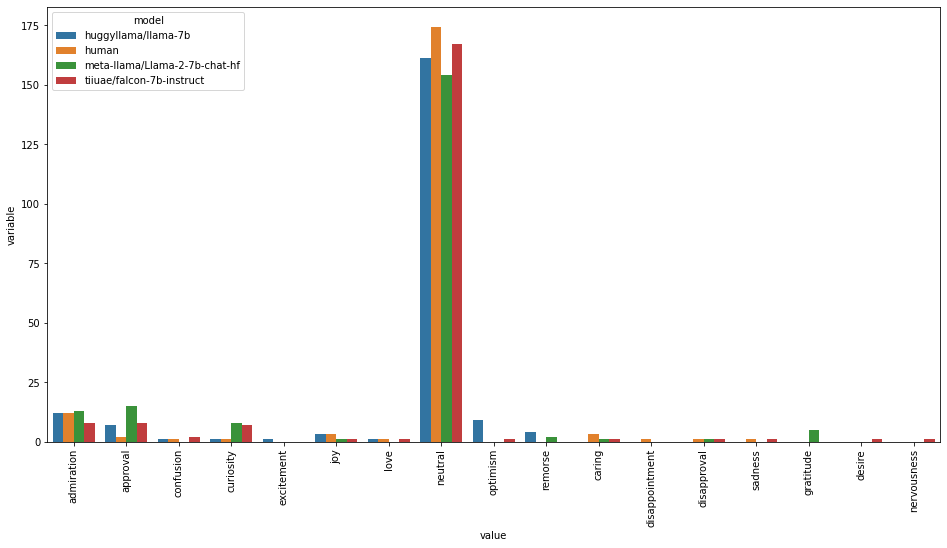

In [36]:
plt.figure(figsize=(16, 8))
# sns.barplot(data= dftmp.groupby(by=["model", "value"]).count().unstack().reset_index().fillna(0))
sns.barplot(data= dftmp.groupby(by=["model", "value"]).count().reset_index(), y="variable", x="value", hue="model" )
plt.xticks(rotation=90)

<AxesSubplot:xlabel='model', ylabel='value'>

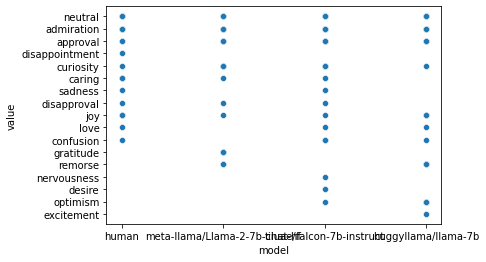

In [37]:
sns.scatterplot(data=dftmp, x="model", y="value",  x_jitter=0.15, y_jitter=0.15)

# Data processing
Put here the core of the notebook. Feel free to further split this section into subsections.

In [56]:
df.emotion_label.unique()

array(['neutral', 'admiration', 'approval', 'disappointment', 'curiosity',
       'caring', 'sadness', 'disapproval', 'joy', 'love', 'confusion',
       'gratitude', 'remorse', 'nervousness', 'desire', 'optimism',
       'excitement'], dtype=object)

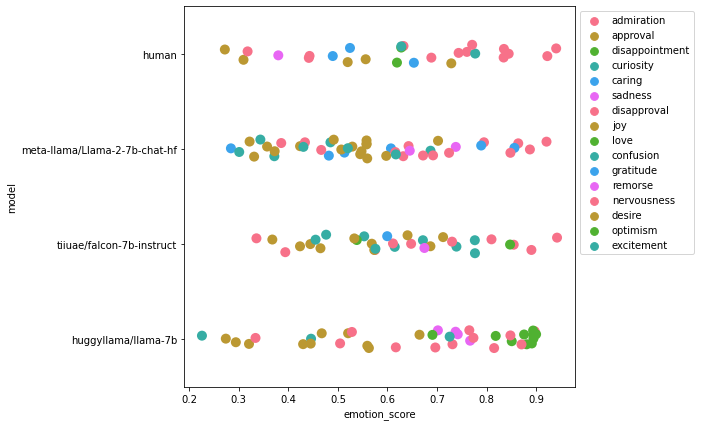

In [85]:
plt.figure(figsize=(7, 7))
palette = sns.color_palette("husl")
# palette = sns.color_palette("vlag")
# palette = sns.color_palette("Spectral", as_cmap=True)
sns.stripplot(data=df.query(f"emotion_label!='neutral'"), y="model", x="emotion_score", hue="emotion_label", size=10
            #   ,hue_order=['love', 'desire', 'caring', 'joy', 'excitement' 'optimism', 'gratitude', 'admiration', 'approval', 'curiosity', 'disapproval', 'confusion', 'nervousness', 'disappointment', 'remorse', 'sadness'] 
              , palette=palette)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

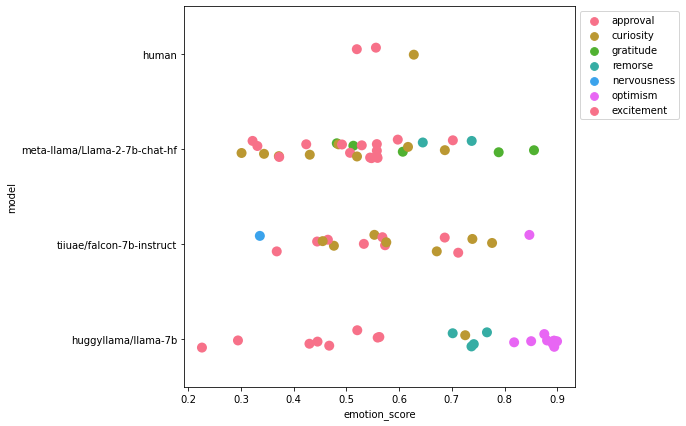

In [112]:
# more expressed by LLMs
plt.figure(figsize=(7, 7))
palette = sns.color_palette("husl")
# palette = sns.color_palette("vlag")
# palette = sns.color_palette("Spectral", as_cmap=True)
tgt_emotions=["optimism", "excitement", "approval", "remorse", "gratitude", "curiosity", "nervousness"]
sns.stripplot(data=df[df.emotion_label.isin(tgt_emotions)], y="model", x="emotion_score", hue="emotion_label", size=10
            #   ,hue_order=['love', 'desire', 'caring', 'joy', 'excitement' 'optimism', 'gratitude', 'admiration', 'approval', 'curiosity', 'disapproval', 'confusion', 'nervousness', 'disappointment', 'remorse', 'sadness'] 
              , palette=palette)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

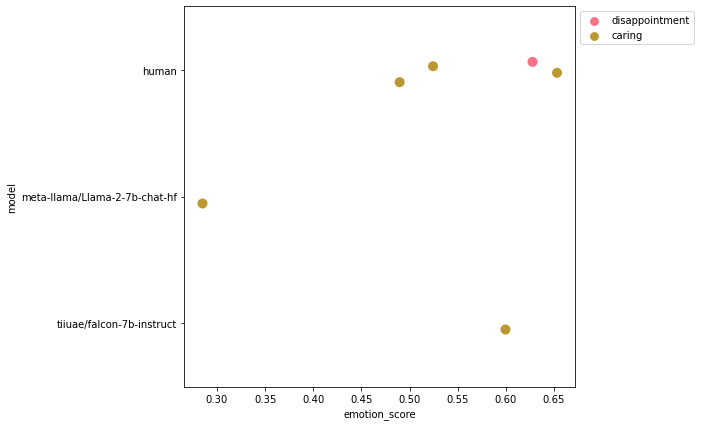

In [114]:
# more expressed by Humans
plt.figure(figsize=(7, 7))
palette = sns.color_palette("husl")
# palette = sns.color_palette("vlag")
# palette = sns.color_palette("Spectral", as_cmap=True)
tgt_emotions=["disappointment", "caring"]
sns.stripplot(data=df[df.emotion_label.isin(tgt_emotions)], y="model", x="emotion_score", hue="emotion_label", size=10
            #   ,hue_order=['love', 'desire', 'caring', 'joy', 'excitement' 'optimism', 'gratitude', 'admiration', 'approval', 'curiosity', 'disapproval', 'confusion', 'nervousness', 'disappointment', 'remorse', 'sadness'] 
              , palette=palette)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

#### using the soft-logits

In [197]:
[c for c in df.iloc[:,6:].columns if "irony" not in c and "convincing" not in c]

['admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise',
 'neutral']

In [200]:
# df[["model", *df.iloc[:,6:].columns]].melt(id_vars=["model"])
df[["model", *[c for c in df.iloc[:,6:].columns if "irony" not in c and "convincing" not in c]]].melt(id_vars=["model"])

,model,variable,value
0,human,admiration,0.002117
1,human,admiration,0.000200
2,human,admiration,0.000224
3,human,admiration,0.000112
4,human,admiration,0.001270
...,...,...,...
22395,huggyllama/llama-7b,neutral,0.587537
22396,huggyllama/llama-7b,neutral,0.982460
22397,huggyllama/llama-7b,neutral,0.978341
22398,huggyllama/llama-7b,neutral,0.918327


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'non_convincing'),
  Text(1, 0, 'convincing'),
  Text(2, 0, 'admiration'),
  Text(3, 0, 'amusement'),
  Text(4, 0, 'anger'),
  Text(5, 0, 'annoyance'),
  Text(6, 0, 'approval'),
  Text(7, 0, 'caring'),
  Text(8, 0, 'confusion'),
  Text(9, 0, 'curiosity'),
  Text(10, 0, 'desire'),
  Text(11, 0, 'disappointment'),
  Text(12, 0, 'disapproval'),
  Text(13, 0, 'disgust'),
  Text(14, 0, 'embarrassment'),
  Text(15, 0, 'excitement'),
  Text(16, 0, 'fear'),
  Text(17, 0, 'gratitude'),
  Text(18, 0, 'grief'),
  Text(19, 0, 'joy'),
  Text(20, 0, 'love'),
  Text(21, 0, 'nervousness'),
  Text(22, 0, 'optimism'),
  Text(23, 0, 'pride'),
  Text(24, 0, 'realization'),
  Text(25, 0, 'relief'),
  Text(26, 0, 'remorse'),
  Text(27, 0, 'sadness'),
  Text(28, 0, 'surprise'),
  Text(29, 0, 'neutral'),
  Text(30, 0, 'non_irony'),
  Text(31, 0, 'irony'

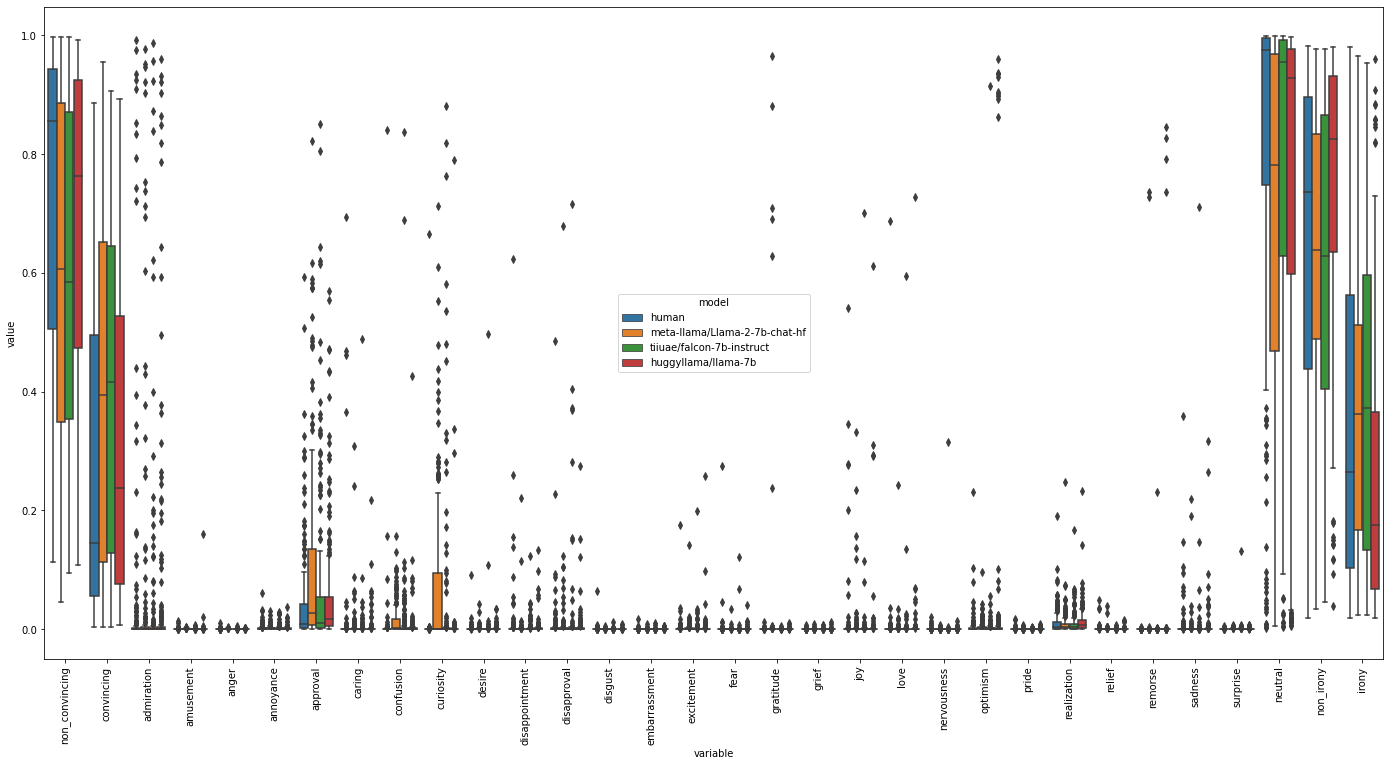

In [190]:
plt.figure(figsize=(24, 12))
sns.boxplot(data=df[["model", *df.iloc[:,6:].columns]].melt(id_vars=["model"]), x="variable", y="value", hue="model")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'admiration'),
  Text(1, 0, 'amusement'),
  Text(2, 0, 'anger'),
  Text(3, 0, 'annoyance'),
  Text(4, 0, 'approval'),
  Text(5, 0, 'caring'),
  Text(6, 0, 'confusion'),
  Text(7, 0, 'curiosity'),
  Text(8, 0, 'desire'),
  Text(9, 0, 'disappointment'),
  Text(10, 0, 'disapproval'),
  Text(11, 0, 'disgust'),
  Text(12, 0, 'embarrassment'),
  Text(13, 0, 'excitement'),
  Text(14, 0, 'fear'),
  Text(15, 0, 'gratitude'),
  Text(16, 0, 'grief'),
  Text(17, 0, 'joy'),
  Text(18, 0, 'love'),
  Text(19, 0, 'nervousness'),
  Text(20, 0, 'optimism'),
  Text(21, 0, 'pride'),
  Text(22, 0, 'realization'),
  Text(23, 0, 'relief'),
  Text(24, 0, 'remorse'),
  Text(25, 0, 'sadness'),
  Text(26, 0, 'surprise')])

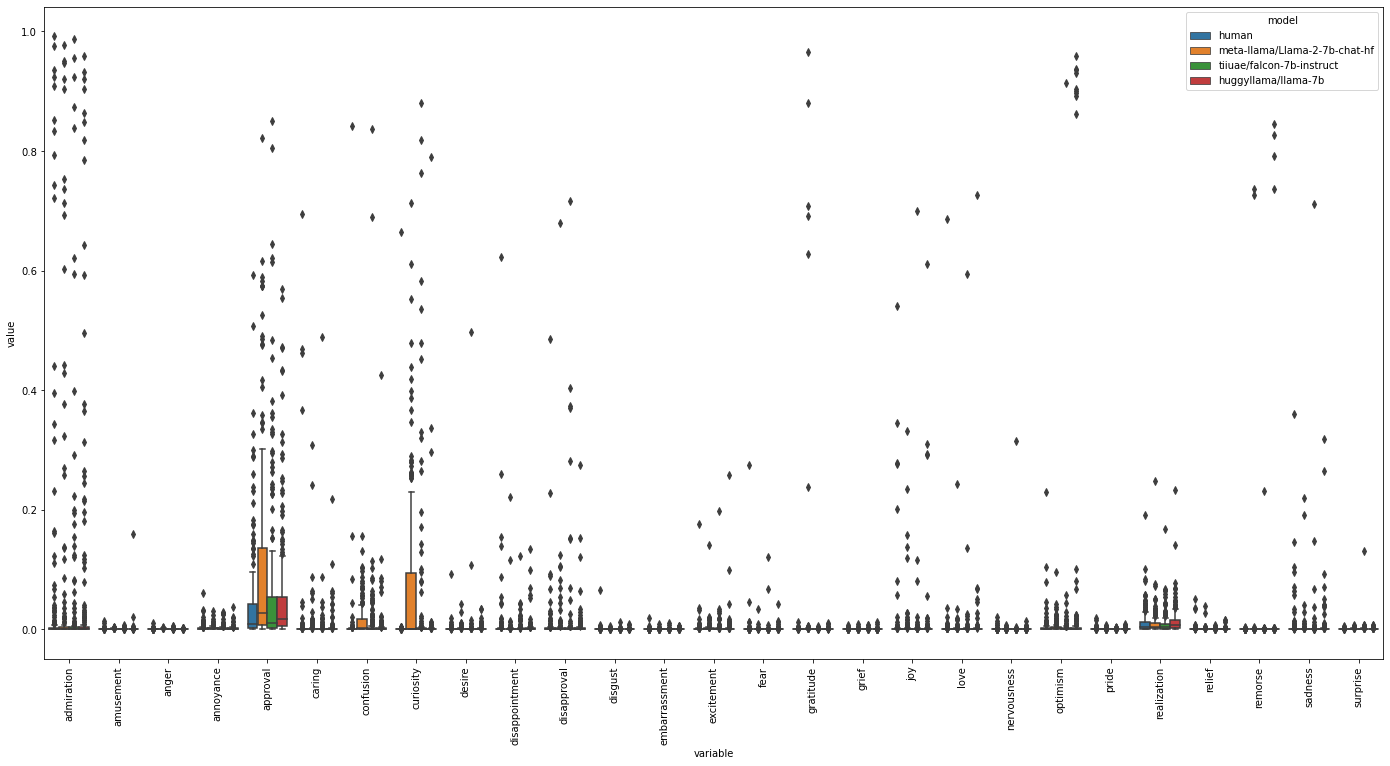

In [202]:
plt.figure(figsize=(24, 12))
sns.boxplot(data=df[["model", *[c for c in df.iloc[:,6:].columns if "irony" not in c and "convincing" not in c and "neutral" not in c]]].melt(id_vars=["model"]), x="variable", y="value", hue="model")
plt.xticks(rotation=90)

In [19]:
# plt.figure(figsize=(15, 15))
# sns.scatterplot(data=df, x="model", y="category", size="emotion_score", x_jitter=0.15, y_jitter=0.15)
# # .add(so.Dots(), so.Jitter())
# plt.xticks(rotation=90)

# Predicting power

In [18]:
df.corr()

,Unnamed: 0,convincing_score,emotion_score,irony_score
Unnamed: 0,1.000000,-0.088998,-0.011643,0.043417
convincing_score,-0.088998,1.000000,-0.114139,-0.029183
emotion_score,-0.011643,-0.114139,1.000000,0.075070
irony_score,0.043417,-0.029183,0.075070,1.000000


In [19]:
print(df[["model", *[c for c in df.columns if "_label" in c] ]])

                   model convincing_label emotion_label irony_label
0                  human          LABEL_0       neutral   non_irony
1                  human          LABEL_0       neutral   non_irony
2                  human          LABEL_0       neutral   non_irony
3                  human          LABEL_0       neutral   non_irony
4                  human          LABEL_0       neutral       irony
..                   ...              ...           ...         ...
795  huggyllama/llama-7b          LABEL_1       neutral       irony
796  huggyllama/llama-7b          LABEL_0       neutral   non_irony
797  huggyllama/llama-7b          LABEL_0       neutral   non_irony
798  huggyllama/llama-7b          LABEL_0       neutral   non_irony
799  huggyllama/llama-7b          LABEL_0       neutral       irony

[800 rows x 4 columns]


In [20]:
dftmp2 = df[["model", "category", *[c for c in df.columns if "_label" in c]]]
dftmp2

,model,category,convincing_label,emotion_label,irony_label
0,human,brainstorming,LABEL_0,neutral,non_irony
1,human,closed_qa,LABEL_0,neutral,non_irony
2,human,general_qa,LABEL_0,neutral,non_irony
3,human,information_extraction,LABEL_0,neutral,non_irony
4,human,open_qa,LABEL_0,neutral,irony
...,...,...,...,...,...
795,huggyllama/llama-7b,open_qa,LABEL_1,neutral,irony
796,huggyllama/llama-7b,open_qa,LABEL_0,neutral,non_irony
797,huggyllama/llama-7b,closed_qa,LABEL_0,neutral,non_irony
798,huggyllama/llama-7b,brainstorming,LABEL_0,neutral,non_irony


In [21]:
dftmp3 = pd.get_dummies(dftmp2)
dftmp3 = dftmp3[["model_human", *[c for c in dftmp3.columns if "_label" in c ]]]
dftmp3

,model_human,convincing_label_LABEL_0,convincing_label_LABEL_1,emotion_label_admiration,emotion_label_approval,emotion_label_caring,emotion_label_confusion,emotion_label_curiosity,emotion_label_desire,emotion_label_disappointment,emotion_label_disapproval,emotion_label_excitement,emotion_label_gratitude,emotion_label_joy,emotion_label_love,emotion_label_nervousness,emotion_label_neutral,emotion_label_optimism,emotion_label_remorse,emotion_label_sadness,irony_label_irony,irony_label_non_irony
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
796,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
797,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
798,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [210]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [211]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


In [221]:
[1 if "human" in c else 0 for c in df.iloc[:,4].to_numpy()]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [222]:
# X,y= dftmp2.iloc[:,2:].to_numpy(), dftmp2.iloc[:,0].to_numpy()
# X,y= dftmp3.iloc[:,1:].to_numpy(), dftmp3.iloc[:,0].to_numpy()
X,y = df.iloc[:,6:].to_numpy(), [1 if "human" in c else 0 for c in df.iloc[:,4].to_numpy()]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)
print(f"{X_train.shape} - {X_test.shape})")

(536, 32) - (264, 32))


In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
# from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, roc_auc_score

In [223]:

samplling_u = RandomUnderSampler(sampling_strategy='majority')
# clf = RandomForestClassifier(max_depth=4)
clf = SVC(kernel="linear")
pipeline = make_pipeline(
    # RandomUnderSampler(sampling_strategy='majority'),
    RandomOverSampler(sampling_strategy=0.5), # i.e., minority/majority = 0.5
    RandomUnderSampler(sampling_strategy='majority'), # i.e., minority/majority = 1.0
    clf,
)

ftprs = []
aucs = []
for i in range(0,10):
    # clf = RandomForestClassifier(max_depth=2)
    # clf = SVC(kernel="linear")
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=None)
    # print(f"Train: {X_train.shape} 1s:[{sum(y_train)}] | Test: {X_test.shape} 1s:[{sum(y_test)}]")
    # clf = clf.fit(X_train, y_train)    
    pipeline.fit(X_train, y_train)
    print(pipeline.score(X_test, y_test))
    y_hat = pipeline.predict(X_test)
    print(classification_report(y_test, y_hat))
    aucs.append(roc_auc_score(y_test, y_hat))
    print(f"AUC: {aucs[-1]}")
    print("\n\n-------------------------")

    fpr, tpr, thresholds = roc_curve(y_test, y_hat)
    # print (f"{fpr}, {tpr}, {thresholds}")

    ftprs.append((fpr, tpr))
    # plt.plot(fpr, tpr)

# evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
# scores = cross_val_score(pipeline, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
# print(scores)
# score = np.mean(scores)
# print('F1 Score: %.3f' % score)


0.5984848484848485
              precision    recall  f1-score   support

           0       0.87      0.55      0.67       198
           1       0.36      0.74      0.48        66

    accuracy                           0.60       264
   macro avg       0.61      0.65      0.58       264
weighted avg       0.74      0.60      0.62       264

AUC: 0.6464646464646464


-------------------------
0.5643939393939394
              precision    recall  f1-score   support

           0       0.84      0.53      0.65       201
           1       0.31      0.68      0.43        63

    accuracy                           0.56       264
   macro avg       0.58      0.60      0.54       264
weighted avg       0.71      0.56      0.60       264

AUC: 0.6049514333096423


-------------------------
0.4431818181818182
              precision    recall  f1-score   support

           0       0.87      0.33      0.48       204
           1       0.27      0.83      0.40        60

    accuracy         

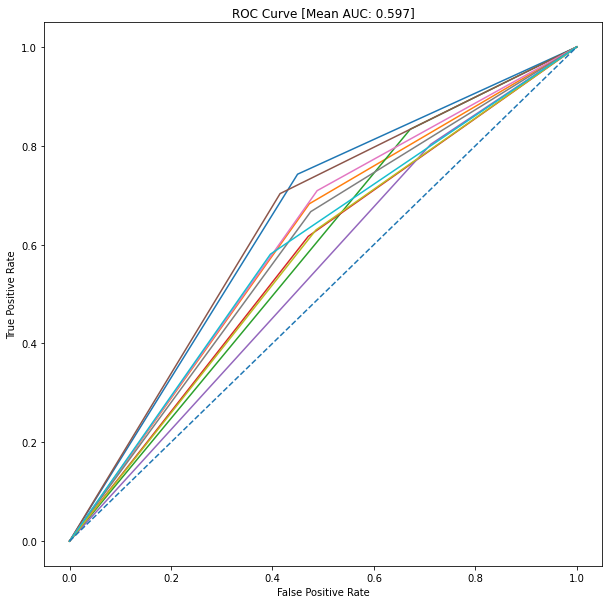

In [224]:
plt.figure(figsize=(10, 10))
for c in ftprs:
    print()
    plt.plot(c[0], c[1])
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve [Mean AUC: {np.mean(aucs):.3f}]')
plt.show()    


In [35]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       197
           1       0.00      0.00      0.00        67

    accuracy                           0.74       264
   macro avg       0.37      0.49      0.42       264
weighted avg       0.56      0.74      0.63       264



In [30]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline

In [123]:
ordinal_encoder = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
    # Use short feature names to make it easier to specify the categorical
    # variables in the HistGradientBoostingRegressor in the next step
    # of the pipeline.
    verbose_feature_names_out=False,
)

rf_ordinal = make_pipeline(
    ordinal_encoder, RandomForestClassifier(max_depth=3, random_state=42)
)

In [127]:
from sklearn.model_selection import cross_validate

n_cv_folds =3
scoring="f1_macro"
dropped_result = cross_validate(rf_ordinal, dftmp2.iloc[:,2:], dftmp2.iloc[:,0], cv=n_cv_folds, scoring=scoring)

/home/owlmx/miniconda3/envs/py38ptpl/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/home/owlmx/miniconda3/envs/py38ptpl/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/owlmx/miniconda3/envs/py38ptpl/lib/python3.8/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/owlmx/miniconda3/envs/py38ptpl/lib/python3.8/site-packages/sklearn/ensemble/_fores